# **Bike Sharing**

A capstone 3 (ML) project by Qonita Shobrina

## **Contents**

1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation

****

## **Business Problem Understanding**

### **Context**
Bike-sharing systems are a new generation of traditional bike rentals where the whole process, from membership, rental, and return back, has become automatic. Through these systems, a user can easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousand bicycles. Today, great interest exists in these systems due to their important role in traffic, environmental, and health issues.
Unlike other transport services such as buses or subways, the duration of travel, departure, arrival position, and many other parameters are explicitly recorded in Bike-sharing systems. This feature turns this system into a virtual sensor network that can be used for sensing mobility in the city. Which could provide us the knowledge to understand users behavior and demands on some cases of the city conditions by monitoring these data.

### **Problem Statement**
The issues with rental services is failing to fulfil the number of request of its services. It may stem from the resource shortages, management setbacks, system failures, and other potential disaster like a bad weather. With the problem occuring, it is not only restrict the service scope and tighten the revenue margin, but also could affect the pre and post performances, such as user experiences and impressions. Hence it is important to know the **size of rally needs**, especially **on the peak momentsIdentifying this peak moments could also help with arrangements regarding service providence and other required handling strategies like facility maintenance.**. 
Keeping in mind that cycling is a commonly outdoor activities, the condition of meteorological condition generally play an important role on people cycling potency.

### **Goals**
To speculate a day's bike demand based on the weather condition, particularly on a predicted busy days, we can utilize data from the bike-sharing systems. Data about atmospheric and climate conditions (temperature, weather, etc), and events availability could be used to forecast the generic mobility rate of various state cases. From that, the bike demands on a specific day could be predicted, which can also help the service company to analyse, foresee, and take precautions to any possibility of error.

### **Analytic Approach**
By analyzing the available data and finding any patterns or similarities on each cases, a suitable machine-learning-based prediction tools could be builded to help the bike-sharing services enterprise estimating their services accessibility.

### **Metric Evaluation**
RMSE, MAE, and MAPE error metrics will be used to evaluate model accuracy. Where lowest error means a more accurate result of model prediction towards what the actual result would be. Next, if the best prediction model came up to be a simple linear model, we can use R-squared or adjusted R-squared metrics to assess the overall variance of the data. Score of 1 (one) in this metrics denotes the best fitting model forecasting.

## **Data Understanding**

- The data in this dataset are from year 2011-2012.
- Every row each is a data recorded in each hour where there are at least someone use the bike-sharing service.

### **Attributes Information**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| dteday | Object | date |
| season | Integer | season (1: winter, 2: spring, 3: summer, 4: fall) |
| hr | Integer | hour (0 to 23) |
| holiday | Integer | holiday or not |
| temp | Float | normalized (actual/measured) temperature in Celsius |
| atemp | Float | normalized feeling temperature in Celsius |
| hum | Float | normalized humidity |
| casual | Integer | number of casual users |
| registered | Integer | number of registered users |
| cnt | Integer | number of casual users |
| weathersit | Integer | weather (1: Clear-partly cloudy, 2: Mist + Cloudy, 3: Light Snow/Rain (+ thunderstorm), 4: Heavy Snow/Rain) |

Note:
- `temp` : The values are derived via (t-tmin)/(tmax-tmin), tmin=-8, t_max=+39 (only in hourly scale)
- `atemp` : The values are derived via (t-tmin)/(tmax-tmin), tmin=-16, t_max=+50 (only in hourly scale)
- although `season` and `weathersit` data are valued as numbers of integer, since each numbers has different values type-wise, it is considered as **categorical** data

#### More about `weathersit`
-	1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - will be labeled as **sunny**
-	2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - will be labeled as **misty**
-	3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - will be labeled as **light**
-	4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
    - will be labeled as **heavy**


In [2]:
# Import library for dataset exploration
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

import warnings
warnings.filterwarnings('ignore')


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "d:\Condaenv\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "d:\Condaenv\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\A S U S\AppData\Roaming\Python\Python39\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\A S U S\AppData\Roaming\Python\Python39\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\A S U S\AppDat

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "d:\Condaenv\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "d:\Condaenv\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\A S U S\AppData\Roaming\Python\Python39\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\A S U S\AppData\Roaming\Python\Python39\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\A S U S\AppDat

AttributeError: _ARRAY_API not found

In [3]:
# Load dataset

df = pd.read_csv('data_bike_sharing.csv')
df

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226,250
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16,18
2,2011-06-15,0.53,1,0,2,0.6212,0.62,23,17,90,107
3,2012-03-31,0.87,2,0,2,0.3485,0.36,8,19,126,145
4,2012-07-31,0.55,1,0,3,0.6970,0.76,18,99,758,857
...,...,...,...,...,...,...,...,...,...,...,...
12160,2012-01-25,0.75,1,0,1,0.2273,0.24,7,14,243,257
12161,2012-07-06,0.62,1,0,3,0.7424,0.78,0,39,63,102
12162,2012-02-20,0.60,2,1,1,0.2121,0.24,5,0,6,6
12163,2012-03-31,0.77,2,0,2,0.4242,0.42,2,14,55,69


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12165 entries, 0 to 12164
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      12165 non-null  object 
 1   hum         12165 non-null  float64
 2   weathersit  12165 non-null  int64  
 3   holiday     12165 non-null  int64  
 4   season      12165 non-null  int64  
 5   atemp       12165 non-null  float64
 6   temp        12165 non-null  float64
 7   hr          12165 non-null  int64  
 8   casual      12165 non-null  int64  
 9   registered  12165 non-null  int64  
 10  cnt         12165 non-null  int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 1.0+ MB


### For easier data exploration
- change dteday data to datetime type
- remap column for 'readable' categorical data / easier to display & understand
    - season
    - weather

In [30]:
# Change dteday data to datetime type for easier time data exploration
df['dteday'] = pd.to_datetime(df['dteday'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12165 entries, 0 to 12164
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      12165 non-null  datetime64[ns]
 1   hum         12165 non-null  float64       
 2   weathersit  12165 non-null  object        
 3   holiday     12165 non-null  int64         
 4   season      12165 non-null  object        
 5   atemp       12165 non-null  float64       
 6   temp        12165 non-null  float64       
 7   hr          12165 non-null  int64         
 8   casual      12165 non-null  int64         
 9   registered  12165 non-null  int64         
 10  cnt         12165 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(5), object(2)
memory usage: 1.0+ MB


In [27]:
# season cat
dict_season = {1: 'winter', 2: 'spring', 3: 'summer', 4: 'autumn'}

df['season'] = df['season'].map(dict_season)
df.head()

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
0,2011-12-09,0.62,1,0,autumn,0.3485,0.36,16,24,226,250
1,2012-06-17,0.64,1,0,spring,0.5152,0.54,4,2,16,18
2,2011-06-15,0.53,1,0,spring,0.6212,0.62,23,17,90,107
3,2012-03-31,0.87,2,0,spring,0.3485,0.36,8,19,126,145
4,2012-07-31,0.55,1,0,summer,0.6970,0.76,18,99,758,857


In [29]:
# weather map
dict_weather = {1: 'sunny', 2: 'misty', 3: 'light', 4: 'heavy'}

df['weathersit'] = df['weathersit'].map(dict_weather)
df.head()

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
0,2011-12-09,0.62,sunny,0,autumn,0.3485,0.36,16,24,226,250
1,2012-06-17,0.64,sunny,0,spring,0.5152,0.54,4,2,16,18
2,2011-06-15,0.53,sunny,0,spring,0.6212,0.62,23,17,90,107
3,2012-03-31,0.87,misty,0,spring,0.3485,0.36,8,19,126,145
4,2012-07-31,0.55,sunny,0,summer,0.6970,0.76,18,99,758,857


## **Exploratory Data Analysis (EDA)**

In [21]:
copal_season = 'deep'
copal_weather = 'Set3'
copal_temp = 'purple'
copal_atemp = 'cyan'

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12165 entries, 0 to 12164
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      12165 non-null  datetime64[ns]
 1   hum         12165 non-null  float64       
 2   weathersit  12165 non-null  object        
 3   holiday     12165 non-null  int64         
 4   season      12165 non-null  object        
 5   atemp       12165 non-null  float64       
 6   temp        12165 non-null  float64       
 7   hr          12165 non-null  int64         
 8   casual      12165 non-null  int64         
 9   registered  12165 non-null  int64         
 10  cnt         12165 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(5), object(2)
memory usage: 1.0+ MB


### **Daily Bike User Distribution**

In [12]:
df.describe()

,dteday,hum,holiday,atemp,temp,hr,casual,registered,cnt
count,12165,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000
mean,2012-01-01 02:04:45.869297408,0.625451,0.029758,0.476996,0.498185,11.519770,35.834443,153.436580,189.271023
min,2011-01-01 00:00:00,0.000000,0.000000,0.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 00:00:00,0.470000,0.000000,0.333300,0.340000,6.000000,4.000000,34.000000,40.000000
50%,2012-01-02 00:00:00,0.620000,0.000000,0.484800,0.500000,12.000000,17.000000,115.000000,142.000000
75%,2012-07-03 00:00:00,0.780000,0.000000,0.621200,0.660000,18.000000,49.000000,220.000000,282.000000
max,2012-12-31 00:00:00,1.000000,1.000000,1.000000,1.000000,23.000000,362.000000,876.000000,970.000000
std,NaN,0.192102,0.169925,0.171857,0.192492,6.931872,49.489286,151.046123,181.223903


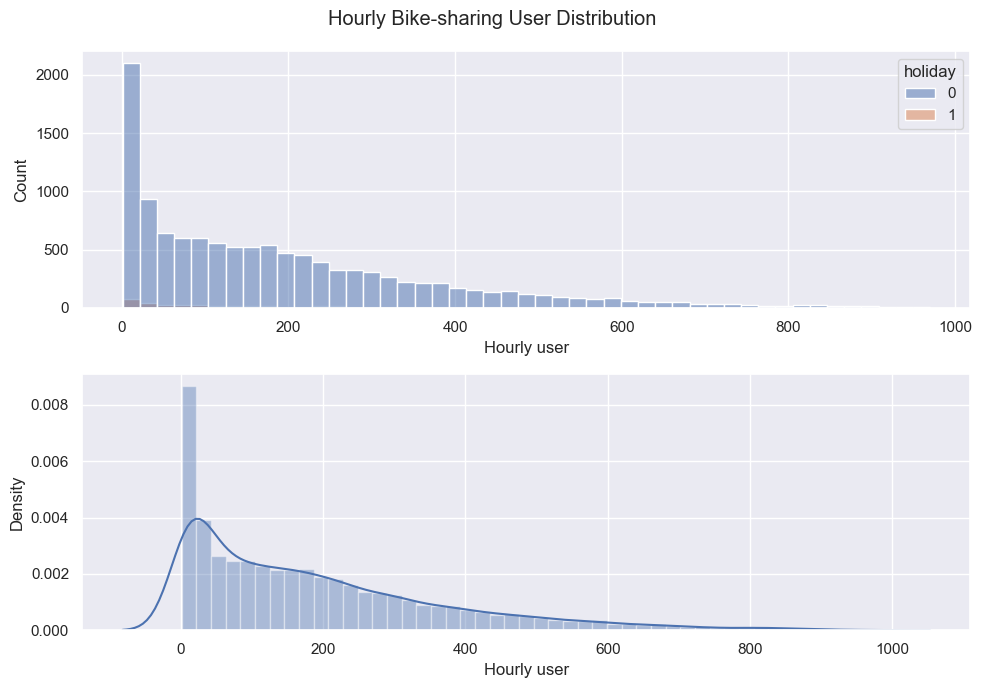

In [38]:
# Bike users number data distribution
fig, axs = plt.subplots(2, 1, figsize=(10, 7))

sns.histplot(data=df, x='cnt', hue='holiday', ax=axs[0])

sns.distplot(df['cnt'], ax=axs[1])

plt.suptitle('Hourly Bike-sharing User Distribution')

for ax in axs.flat:
    ax.set_xlabel('Hourly user')

plt.tight_layout()
plt.show()

In [14]:
df['cnt'].mode()

,cnt
0,5


From the right-skewed distribution graph, we can identify that the daily user counts are denser on the lower number with on most days there are 5 bike users in a day. And more customer tend to use bike-sharing service on non-holiday days.

### **Bike Trip Time (hour of the day)**

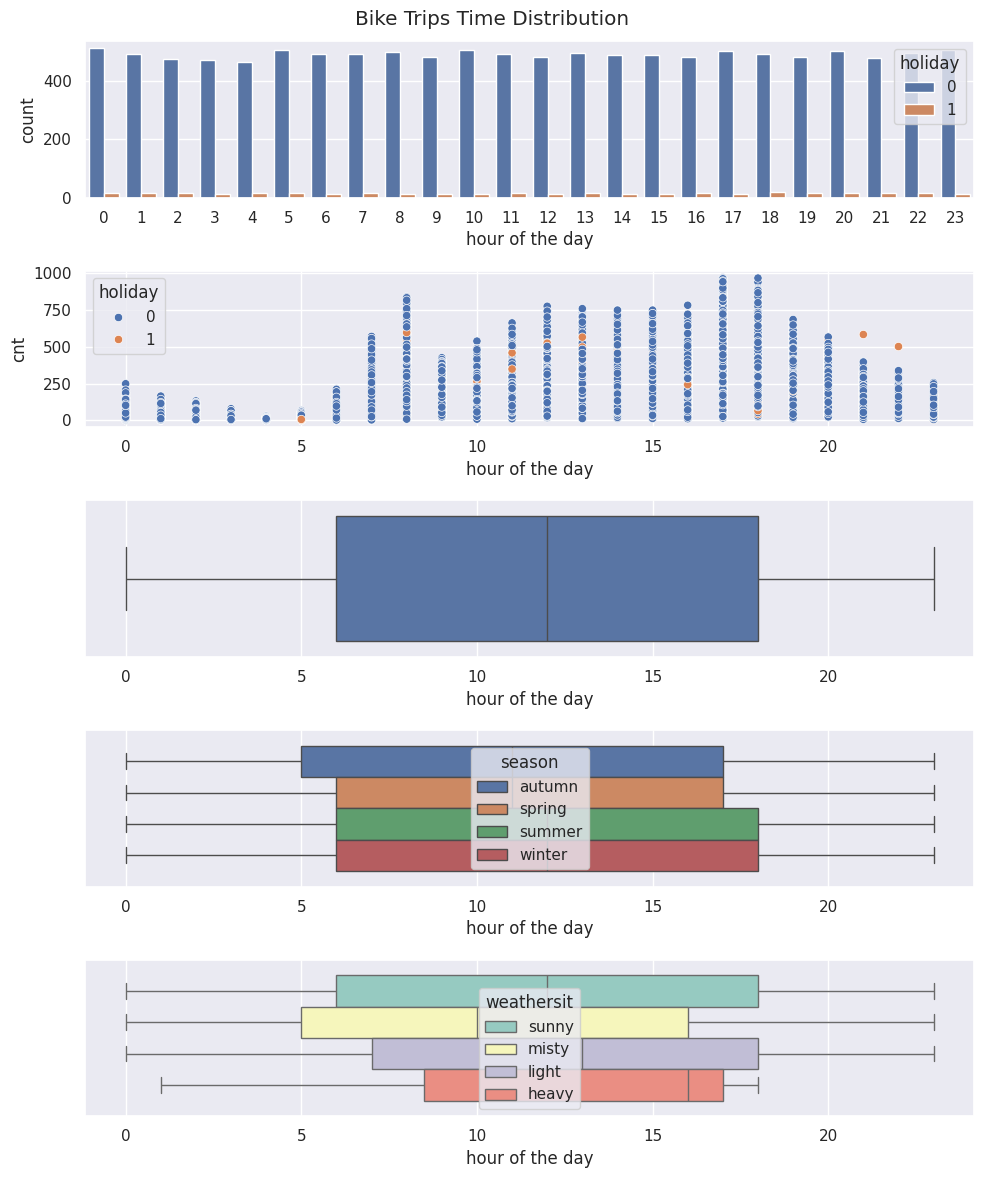

In [15]:
# Bike trip time data distribution
fig, axs = plt.subplots(5, 1, figsize=(10, 12))
plt.suptitle('Bike Trips Time Distribution')

# Hr histogram
sns.countplot(data=df, x='hr', hue='holiday', ax=axs[0])

# scatterplot: hr vs cnt (number of users)
sns.scatterplot(data=df, x='hr', y='cnt', hue='holiday', ax=axs[1])
axs[1]

# Boxplot
sns.boxplot(data=df, x='hr', ax=axs[2])
sns.boxplot(data=df, x='hr', hue='season', palette=copal_season, ax=axs[3])
sns.boxplot(data=df, x='hr', hue='weathersit', palette=copal_weather, ax=axs[4])

for ax in axs.flat:
    ax.set_xlabel('hour of the day')

plt.tight_layout()
plt.show()

- Looking from bike trip busy hour, more customer also use bike-sharing service during non-holiday time.
- Among the hour of the day, by the availability of user, there's no hour that specially high compare to the rest. But when we see it from the quantity, hour 8, 17, and 18 were the busiest hour of the day, while the quiet hour fall in hour 1-5 with average user on those hours were less than 200.
- Notice that the overall busy mobilization start around hour 6 until 18 from the data density.
- Out of the seasons, people generally starts going out earlier in autumn rather than the other seasons. And stay a bit later on winter and summer.
- While weather wise:
    - the buzzling hour starts and ends earlier on misty days.
    - with clear and cloudy sky (sunny), people tend to travel outside on longer time window or more various time schedule.
    - likewise, on worse (heavy) weather people are more reluctant to go anywhere, seeing that the busy time starts later and extend shorter.

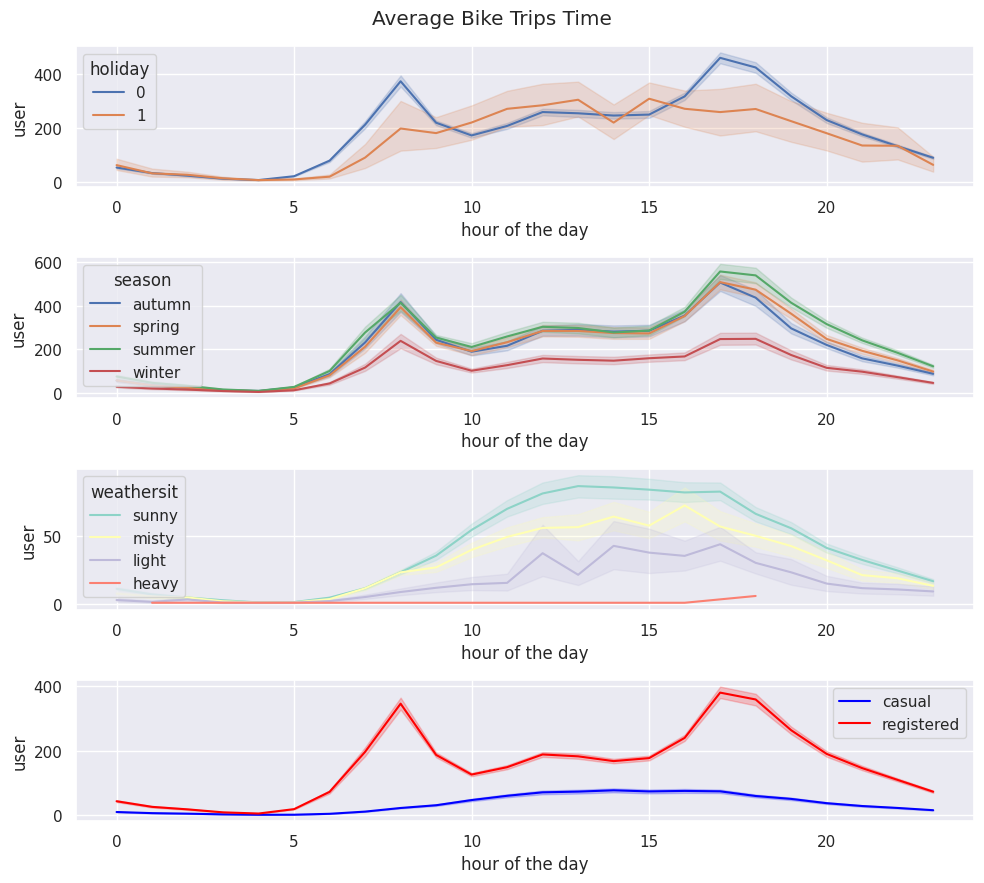

In [16]:
# Bike trip time data distribution
fig, axs = plt.subplots(4, 1, figsize=(10, 9))
plt.suptitle('Average Bike Trips Time')

# holiday or not user counts lineplot
sns.lineplot(data=df, x='hr', y='cnt', hue='holiday', estimator='mean', ax=axs[0])

# user counts lineplot by season
sns.lineplot(data=df, x='hr', y='cnt', estimator='mean', hue='season', palette=copal_season, ax=axs[1])

# user counts lineplot by weather
sns.lineplot(data=df, x='hr', y='casual', estimator='mean', hue='weathersit', palette=copal_weather, ax=axs[2])

# registered vs casual lineplot
sns.lineplot(data=df, x='hr', y='casual', estimator='mean', label='casual', color='blue', ax=axs[3])
sns.lineplot(data=df, x='hr', y='registered', estimator='mean', label='registered', color='red', ax=axs[3])

for ax in axs.flat:
    ax.set_xlabel('hour of the day')
    ax.set_ylabel('user')

plt.tight_layout()
plt.show()

Overall, the user starts crowding the street from hour 5 (5 AM) before reach its peak at hour 8, decreasing, and reach the secoind peak at hour 17-18 (5-6 PM). The peak hours are indentified as the working peak hour (people mobilize to go to and from work/school).
- these pattern is visible on non-holiday moments. on holidays the crowd density start increasing later at 6 AM and have more diverse mobilization activity hourly, making no prominent peak hour to be identified.
- out of the seasons, there're less people mobilize using the bike service on winter.
- people tend to use the bike-sharing more on a better weather (sunny > misty > light > heavy).
- the busy hour pattern is visible on registered user segment.

### **Temperature (measured, feels) & Humidity**

#### **Temperatures**
- `temp` : **actual/measured** temperatures in Celsius.
    - The values are derived via (t-tmin)/(tmax-tmin), tmin=-8, t_max=+39 (only in hourly scale)
- `atemp` : **feeled** temperatures in Celsius.
    - The values are derived via (t-tmin)/(tmax-tmin), tmin=-16, t_max=+50 (only in hourly scale)

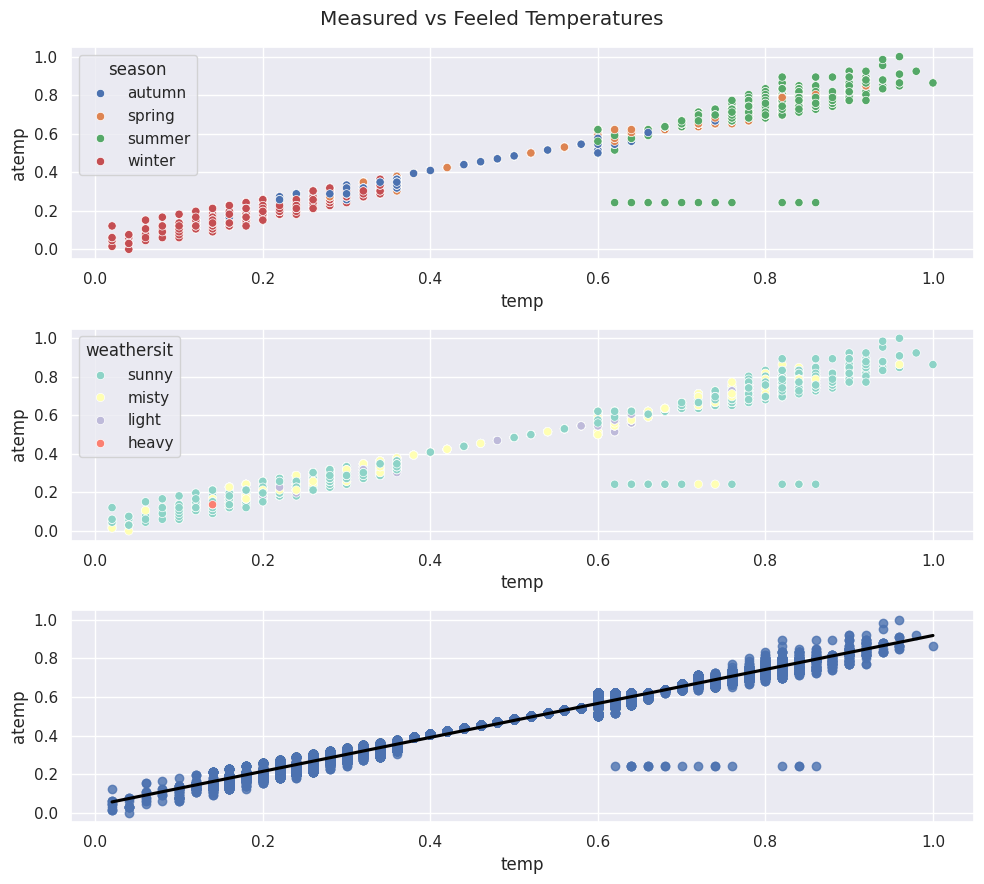

In [17]:
fig, axs = plt.subplots(3, 1, figsize=(10, 9))
plt.suptitle('Measured vs Feeled Temperatures')

# scatter plot: by season
sns.scatterplot(data=df, x='temp', y='atemp', hue='season', palette=copal_season, ax=axs[0])

# scatter plot: by weather
sns.scatterplot(data=df, x='temp', y='atemp', hue='weathersit', palette=copal_weather, ax=axs[1])

# regression plot
sns.regplot(data=df, x='temp', y='atemp', ci=0, line_kws={"color": "black"}, ax=axs[2])

plt.tight_layout()
plt.show()

From the regression plot, the measured and feeled temperature (temp, atemp) are highly correlated. Except for some moments/day in summer (feels colder at a similar/same celcius on a range of the actual temperature).
- on winter the measured and feeled temperatures are colder, when on summer the temperatures are hotter. Temperatures on spring and autumn fall in-between.

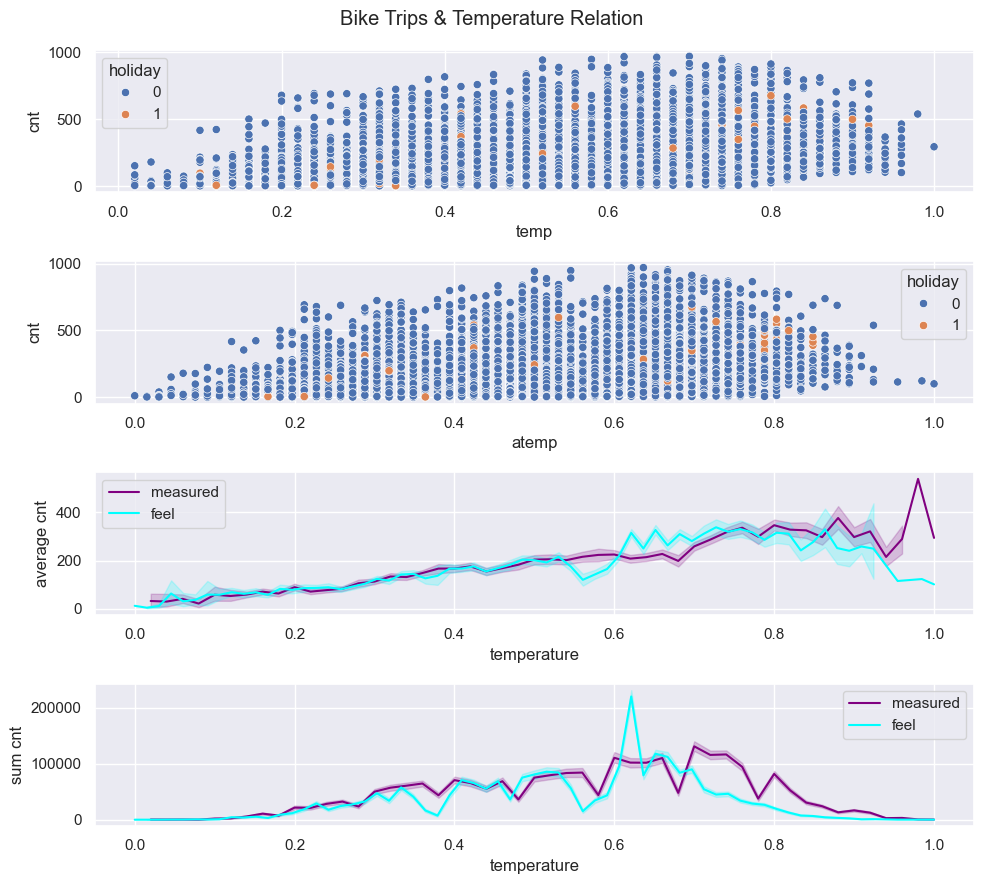

In [22]:
# Bike trip temperatures data distribution
fig, axs = plt.subplots(4, 1, figsize=(10, 9))
plt.suptitle('Bike Trips & Temperature Relation')

# temp & atemp: holiday or not user counts lineplot
sns.scatterplot(data=df, x='temp', y='cnt', hue='holiday', ax=axs[0])
sns.scatterplot(data=df, x='atemp', y='cnt', hue='holiday', ax=axs[1])

# avg cnt
sns.lineplot(data=df, x='temp', y='cnt', estimator='mean', label='measured', color='purple', ax=axs[2])
sns.lineplot(data=df, x='atemp', y='cnt', estimator='mean', label='feel', color='cyan', ax=axs[2])
axs[2].set_xlabel('temperature')
axs[2].set_ylabel('average cnt')

# sum cnt
sns.lineplot(data=df, x='temp', y='cnt', estimator='sum', label='measured', color=copal_temp, ax=axs[3])
sns.lineplot(data=df, x='atemp', y='cnt', estimator='sum', label='feel', color=copal_atemp, ax=axs[3])
axs[3].set_xlabel('temperature')
axs[3].set_ylabel('sum cnt')

plt.tight_layout()
plt.show()

- on average, people tend to use the service on a warmer temperature (actual or feeled).
- while on total, more people use the bike-sharing on a day/time when feel warmer on certain temperature.

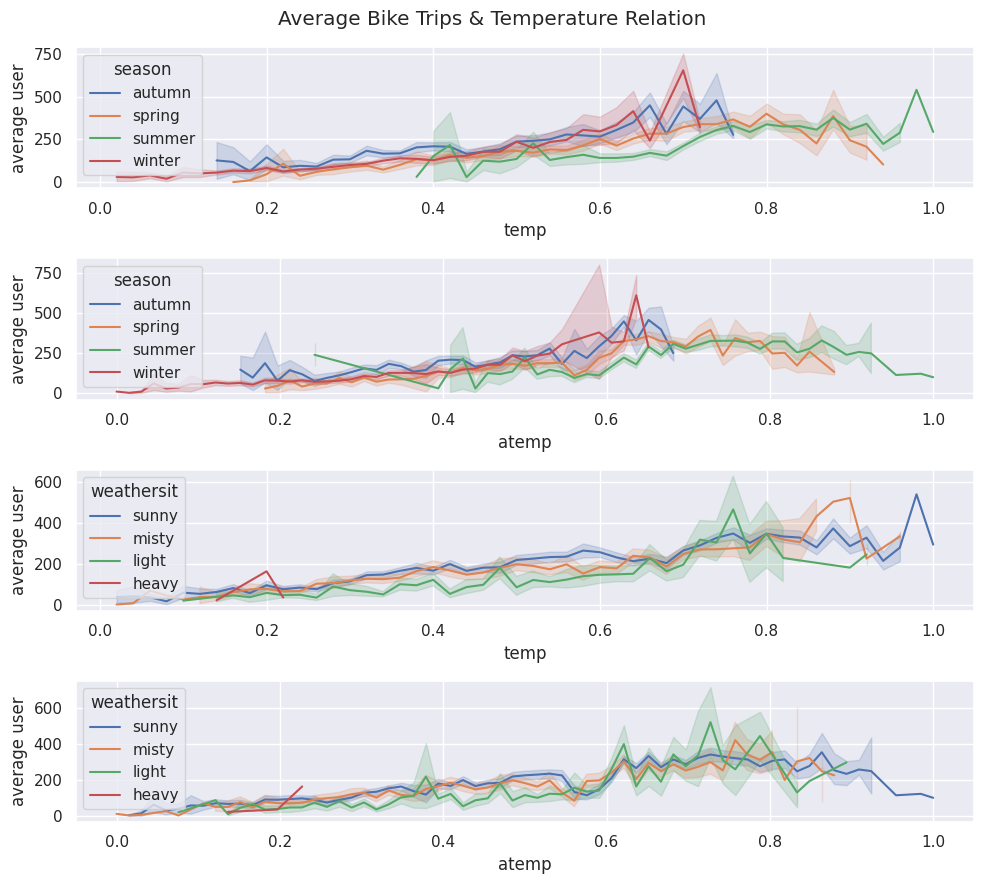

In [19]:
# Average Bike trip data distribution
fig, axs = plt.subplots(4, 1, figsize=(10, 9))
plt.suptitle('Average Bike Trips & Temperature Relation')

# season temp lineplot: temp
sns.lineplot(data=df, x='temp', y='cnt', estimator='mean', hue='season', ax=axs[0])

# season lineplot: atemp
sns.lineplot(data=df, x='atemp', y='cnt', estimator='mean', hue='season', ax=axs[1])

# weather temp lineplot: temp
sns.lineplot(data=df, x='temp', y='cnt', estimator='mean', hue='weathersit', ax=axs[2])

# weather lineplot: atemp
sns.lineplot(data=df, x='atemp', y='cnt', estimator='mean', hue='weathersit', ax=axs[3])

for ax in axs.flat:
    ax.set_ylabel('average user')

plt.tight_layout()
plt.show()

On average, more people uses the bike service on warm day.

#### **Humidity**

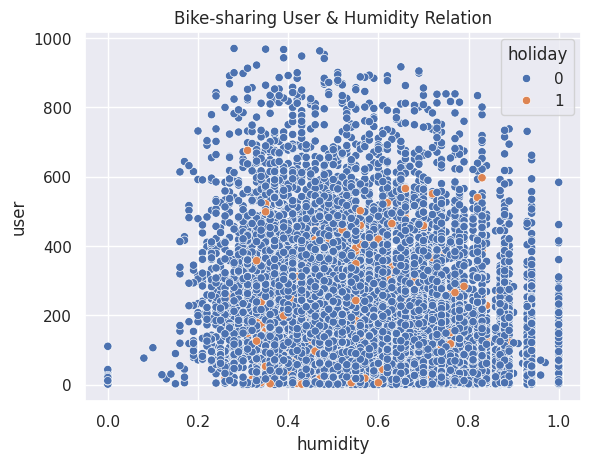

In [20]:
sns.scatterplot(data=df, x='hum', y='cnt', hue='holiday')

plt.title('Bike-sharing User & Humidity Relation')
plt.xlabel('humidity')
plt.ylabel('user')

plt.show()

Bike trips are denser/more common on times with mid humidity.

### **Climate & Atmosphere Condition: Season & Weather**

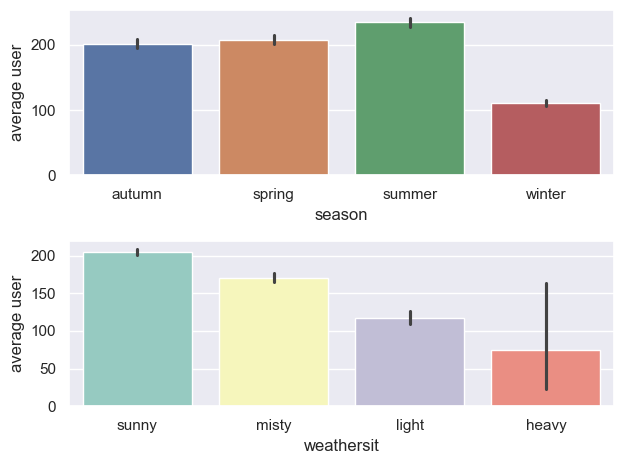

In [37]:
# Average users in season & weather
fig, axs = plt.subplots(2, 1)

#  Season
sns.barplot(data=df, x='season', y='cnt', estimator='mean', palette=copal_season, ax=axs[0])

# Weather
sns.barplot(data=df, x='weathersit', y='cnt', estimator='mean', palette=copal_weather, ax=axs[1])

for ax in axs.flat:
    ax.set_ylabel('average user')

plt.tight_layout()
plt.show()

From the four seasons, there's lower demand in winter season and higher demand in summer. While for weather, customer prefer to use the bike service on better, clearer, weather. 

### **Bike Users on Holiday**

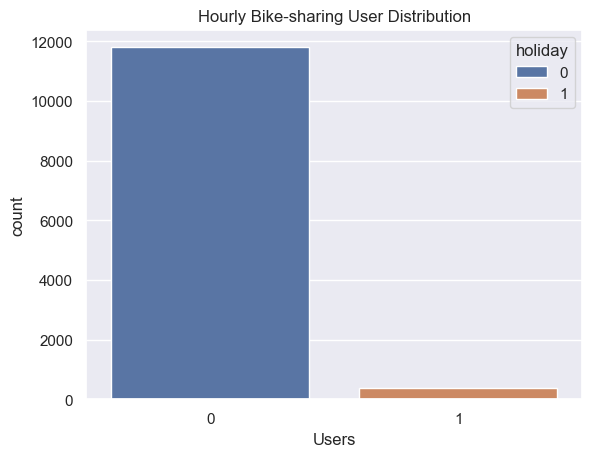

In [39]:
sns.countplot(data=df, x='holiday', hue='holiday')

plt.title('Hourly Bike-sharing User Distribution')
plt.xlabel('Users')

plt.show()

The Bike-sharing service is mainly used on non-holiday days.

### **Daily User Segment Ratio: Casual vs Registered**

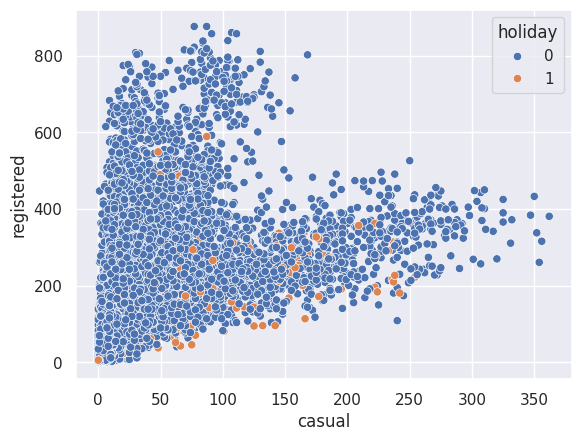

In [22]:
sns.scatterplot(data=df, x='casual', y='registered', hue='holiday')

plt.show()

There are times when there's more casual than registered service user, and there are also times when there's more registered than casual user. However, it's not related with if that day is holiday or not.

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12165 entries, 0 to 12164
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      12165 non-null  datetime64[ns]
 1   hum         12165 non-null  float64       
 2   weathersit  12165 non-null  object        
 3   holiday     12165 non-null  int64         
 4   season      12165 non-null  object        
 5   atemp       12165 non-null  float64       
 6   temp        12165 non-null  float64       
 7   hr          12165 non-null  int64         
 8   casual      12165 non-null  int64         
 9   registered  12165 non-null  int64         
 10  cnt         12165 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(5), object(2)
memory usage: 1.0+ MB


## **Data Preprocessing**

- missing values treatment
- drop unrelevant features
- outlier treatment

### Duplicate & Missing Values

In [24]:
df.duplicated().sum()

np.int64(0)

In [25]:
df.isna().sum()

,0
dteday,0
hum,0
weathersit,0
holiday,0
season,0
atemp,0
temp,0
hr,0
casual,0
registered,0


There's **no** duplicated row and missing value.

### **Data Correlation**

Text(0.5, 1.0, 'Correlation Matrix')

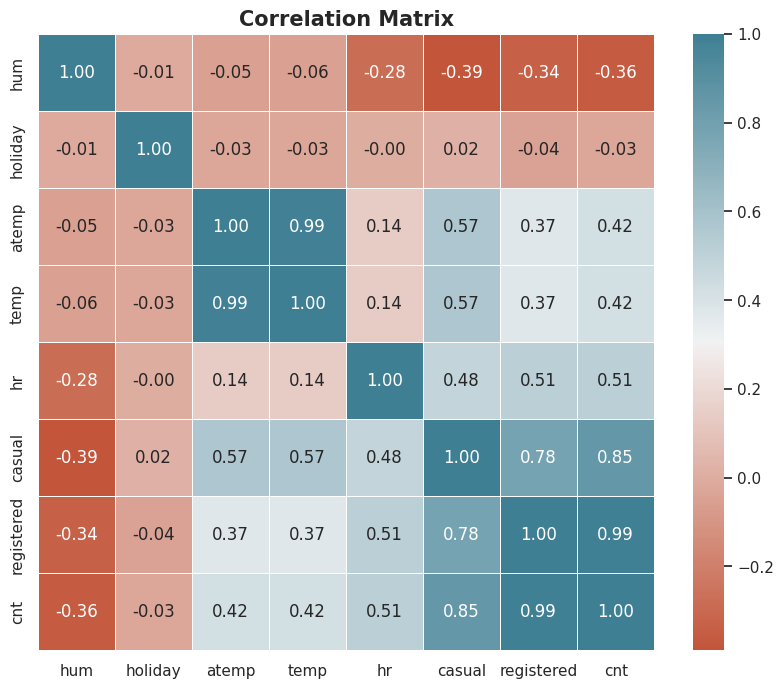

In [26]:
# Correlation matrix
plt.figure(figsize=(10, 8))
palette=sns.diverging_palette(20, 220, n=256)
corr = df.corr(method='spearman', numeric_only=True)
sns.heatmap(corr, annot=True, fmt='.2f', cmap=palette, square=True, linewidths=.5)
plt.title('Correlation Matrix', size=15, weight='bold')

- There's a high correlation between the expected group of features:
    - temperature features (temp, atemp)
    - quantity features (cnt, casual, registered)
- The number/quantitiy of bike-sharing system users is:
    - midly corelated with temperature features and mobiility hour.
    - weakly correlated with humidity feature.
    - very weakly correlated with weathers and seasons.

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12165 entries, 0 to 12164
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      12165 non-null  datetime64[ns]
 1   hum         12165 non-null  float64       
 2   weathersit  12165 non-null  object        
 3   holiday     12165 non-null  int64         
 4   season      12165 non-null  object        
 5   atemp       12165 non-null  float64       
 6   temp        12165 non-null  float64       
 7   hr          12165 non-null  int64         
 8   casual      12165 non-null  int64         
 9   registered  12165 non-null  int64         
 10  cnt         12165 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(5), object(2)
memory usage: 1.0+ MB


### **Drop Unrelevant Features**
- Since `dteday` served as unique identifier and has lots of variety, we can drop this column.  
- `hr` on the other hand, although it can be an extended identifier, it's highly correlated to the target (`cnt`). Thus we need this feature for training parameters.
- we can also drop `registered` and `casual` features since our goal is to predict the (**total**) number of users and it's enough represented by `cnt`.
    - and to avoid unncessarily complex model that can lead to model overfitting.

In [4]:
# copy original df to avoid unwanted modification
df_model = df.copy()
df_model.head()

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226,250
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16,18
2,2011-06-15,0.53,1,0,2,0.6212,0.62,23,17,90,107
3,2012-03-31,0.87,2,0,2,0.3485,0.36,8,19,126,145
4,2012-07-31,0.55,1,0,3,0.6970,0.76,18,99,758,857


In [5]:
df_model = df_model.drop(columns=['dteday', 'registered', 'casual'])
df_model.head()

,hum,weathersit,holiday,season,atemp,temp,hr,cnt
0,0.62,1,0,4,0.3485,0.36,16,250
1,0.64,1,0,2,0.5152,0.54,4,18
2,0.53,1,0,2,0.6212,0.62,23,107
3,0.87,2,0,2,0.3485,0.36,8,145
4,0.55,1,0,3,0.6970,0.76,18,857


### **Outlier Identification**

<Axes: >

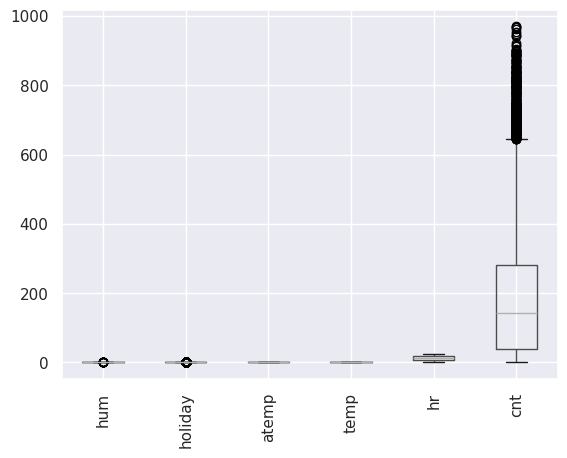

In [30]:
# outlier checking using boxplot
df_model.boxplot(rot=90)

In [31]:
df_model.describe()

,hum,holiday,atemp,temp,hr,cnt
count,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000
mean,0.625451,0.029758,0.476996,0.498185,11.519770,189.271023
std,0.192102,0.169925,0.171857,0.192492,6.931872,181.223903
min,0.000000,0.000000,0.000000,0.020000,0.000000,1.000000
25%,0.470000,0.000000,0.333300,0.340000,6.000000,40.000000
50%,0.620000,0.000000,0.484800,0.500000,12.000000,142.000000
75%,0.780000,0.000000,0.621200,0.660000,18.000000,282.000000
max,1.000000,1.000000,1.000000,1.000000,23.000000,970.000000


From the boxplot, we can see that there are lots of outliers in `cnt` column which are the data about bike-sharing system user. Since it's the number we have to predict and might lead to high probability of false prediction or underfitting (because of deleting important information), we don't need to treat the outliers.

## **Modeling**

In [6]:
# Import library untuk modeling

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

from sklearn.preprocessing import RobustScaler

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

### **Further Modeling Data Preprocessing**

#### **Encoding**
Although in the original dataset the datatype of these columns/features are integer, it turns out that these are categorical features, thus encoding process is needed.
- season (4) --> OneHot
- weathersit (4) --> OneHot


In [7]:
# encode categorical data
transformer = ColumnTransformer(
    transformers=[
    ('One Hot', OneHotEncoder(), ['season', 'weathersit'])
], remainder='passthrough')
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('One Hot', OneHotEncoder(),
                                 ['season', 'weathersit'])])

#### **Scaling**
- There are some numerical continuous features in this dataset:
    - hum 0-1
    - atemp (norm) 0-1
    - temp (norm) 0-1
    - hr 0-23
    - cnt 0-1000~

<br>
The numerical values have various scale, so doing scaling might make the model learning better. Since there are some outliers spotted, we can use **RobustScaler** that is immune to outliers.

In [8]:
scaler = RobustScaler()

### **Dataset Splitting**

In [9]:
# Defining X & y
X = df_model.drop(['cnt'], axis=1)
y = df_model['cnt']

In [37]:
X

,hum,weathersit,holiday,season,atemp,temp,hr
0,0.62,sunny,0,autumn,0.3485,0.36,16
1,0.64,sunny,0,spring,0.5152,0.54,4
2,0.53,sunny,0,spring,0.6212,0.62,23
3,0.87,misty,0,spring,0.3485,0.36,8
4,0.55,sunny,0,summer,0.6970,0.76,18
...,...,...,...,...,...,...,...
12160,0.75,sunny,0,winter,0.2273,0.24,7
12161,0.62,sunny,0,summer,0.7424,0.78,0
12162,0.60,misty,1,winter,0.2121,0.24,5
12163,0.77,misty,0,spring,0.4242,0.42,2


In [38]:
y

,cnt
0,250
1,18
2,107
3,145
4,857
...,...
12160,257
12161,102
12162,6
12163,69


In [11]:
X_train, X_test, y_train, y_test= train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=0)

### **Model Benchmark & Cross Validation**

For the metrics we will use **RMSE (Root Mean Square Error), MAE (Mean Absolute Error), and MAPE (Mean Absolute Percentage Error)** that's common to use for a resression model. But **MAE** will be used for the **main metric** since it is more robust to outliers (we have outliers in target (y) data distribution). 

In [40]:
# Algorithm
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=0)
rf = RandomForestRegressor(random_state=0)
xgb = XGBRegressor(random_state=0)

# Scaling data
scaler = RobustScaler()

#   Model algorithm candidates
models = [lr, knn, dt, rf, xgb]

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

# Finding the best algorithm for each metrics/cross validation
for i in models:

    crossval = KFold(n_splits=5, shuffle=True, random_state=0)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator,
        X_train,
        y_train,
        cv=crossval,
        scoring='neg_root_mean_squared_error',
        error_score='raise'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator,
        X_train,
        y_train,
        cv=crossval,
        scoring='neg_mean_absolute_error',
        error_score='raise'
        )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator,
        X_train,
        y_train,
        cv=crossval,
        scoring='neg_mean_absolute_percentage_error',
        error_score='raise'
        )

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

[-147.94576414 -146.28946501 -148.47889628 -143.02758982 -145.60734222] LinearRegression()
[-109.0454052  -106.55522165 -108.24449539 -106.17386368 -108.07495343] LinearRegression()
[-3.28944919 -3.15782879 -3.18404006 -2.85467717 -3.36541248] LinearRegression()
[-111.16425175 -115.98176069 -116.32151239 -112.91300765 -114.93673446] KNeighborsRegressor()
[-75.5373395  -76.96486903 -77.43792395 -75.63206578 -76.32548818] KNeighborsRegressor()
[-1.2584133  -1.25843976 -1.26674667 -1.0548887  -1.21822555] KNeighborsRegressor()
[-136.69682198 -134.67151125 -133.21445812 -137.35021621 -138.73440473] DecisionTreeRegressor(random_state=0)
[-87.01990241 -84.97675912 -86.25509592 -88.53999657 -88.26772867] DecisionTreeRegressor(random_state=0)
[-0.99058096 -1.08718065 -1.14305045 -1.02342653 -0.98198446] DecisionTreeRegressor(random_state=0)
[-108.03461476 -106.26982443 -104.47209631 -107.41405393 -106.12068869] RandomForestRegressor(random_state=0)
[-70.71373666 -68.91770544 -68.85784965 -69.8

In [41]:
# Comparing algorithms' metric results
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape
})

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
0,Linear Regression,-146.269811,1.930809,-107.618788,1.082018,-3.170282,0.174486
1,KNN Regressor,-114.263453,1.952959,-76.379537,0.739422,-1.211343,0.080036
2,DecisionTree Regressor,-136.133482,1.960645,-87.011897,1.313530,-1.045245,0.061304
3,RandomForest Regressor,-106.462256,1.224146,-69.454967,0.739858,-0.912970,0.050630
4,XGBoost Regressor,-101.471069,1.231999,-67.821611,0.784240,-0.981104,0.043433


#### **Interpretation**
From the 5 algorithm, **XGBoost** has the lowest RMSE and MAE score, and is more stable on MAPE metrics. **Random Forest** has the lowest MAPE and more stable (lower standard deviation/std) on RMSE and MAE metrics, though it is not that far from XGBoost's.  
- Hence, we will use RandomForest and XGBoost Regressor model for the next step: hyperparameter tuning and test set evaluation.

### **Testing the Benchmarking Models: Untuned**

In [42]:
# model benchmark
models = {
        'RandomForest': RandomForestRegressor(random_state=0),
        'XGB': XGBRegressor(random_state=0)
}

score_rmse = []
score_mae = []
score_mape = []

# Prediksi pada test set
for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape}, index=models.keys())
score_before_tuning

,RMSE,MAE,MAPE
RandomForest,108.118888,70.646092,0.933218
XGB,100.895212,67.574516,0.968756


From the test results, similar to dataset training, XGBoost has the best RMSE and MAE score and RandomForest has the best MAPE score. But since we have some outliers in our target (bike user count) data, since MAE metric is more robust to outliers, XGBoost algorithm is chosen for hyperparameter tuning. 
- The model training and testing using XGBoost (untuned) both havee around 67 MAE score. Meaning that it's **not overfitting nor underfitting**. 

### **Hyperparameter Tuning**
For a more thorough tuning, GridSearch cross validator is used. 

In [43]:
max_depth = list(np.arange(1, 11, 2))
learning_rate = list(np.arange(1, 100, 20)/100)
n_estimators = list(np.arange(100, 201, 20))

In [44]:
# hyperparam
hyperparam = {
    'model__max_depth': max_depth,
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators
}

# pipe prep_model
pipe_model = Pipeline([
    ('preprocessing', transformer),
    ('scaler', scaler),
    ('model', xgb)
])

crossval = KFold(n_splits=5, shuffle=True, random_state=1)

# tuning gridsearch
gridsearch_xgb = GridSearchCV(
    estimator= pipe_model,
    cv = crossval,
    param_grid= hyperparam,
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'],
    n_jobs=-1,
    refit = 'neg_mean_absolute_error'
)


In [45]:
gridsearch_xgb.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('One '
                                                                         'Hot',
                                                                         OneHotEncoder(),
                                                                         ['season',
                                                                          'weathersit'])])),
                                       ('scaler', RobustScaler()),
                                       ('model',
                                        XGBRegressor(base_score=None,
                                                     booster=None,
                                                     callbacks=None,
                                                     colsample_bylevel=None,
                                                     colsample_bynode=N...
                                                  np.float64(0.61),
                                                  np.float64(0.81)],
                         'model__max_depth': [np.int64(1), np.int64(3),
                                              np.int64(5), np.int64(7),
                                              np.int64(9)],
                         'model__n_estimators': [np.int64(100), np.int64(120),
                                                 np.int64(140), np.int64(160),
                                                 np.int64(180),
                                                 np.int64(200)]},
             refit='neg_mean_absolute_error',
             scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error',
                      'neg_mean_absolute_percentage_error'])

In [80]:
pd.DataFrame(gridsearch_xgb.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__learning_rate,param_model__max_depth,param_model__n_estimators,params,split0_test_neg_root_mean_squared_error,split1_test_neg_root_mean_squared_error,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
42,0.166322,0.014637,0.019358,0.000474,0.21,5,100,"{'model__learning_rate': 0.21, 'model__max_dep...",-98.430519,-101.584976,...,1.451591,1,-0.965605,-0.843509,-1.102708,-0.942052,-0.978358,-0.966446,0.082968,12
43,0.182069,0.005305,0.020535,0.000413,0.21,5,120,"{'model__learning_rate': 0.21, 'model__max_dep...",-98.539948,-101.785530,...,1.425672,2,-0.971569,-0.858186,-1.103660,-0.960397,-0.988214,-0.976405,0.078216,14
44,0.207236,0.009202,0.021431,0.000536,0.21,5,140,"{'model__learning_rate': 0.21, 'model__max_dep...",-98.594948,-101.867287,...,1.397313,3,-0.992273,-0.868502,-1.108509,-0.963220,-1.025836,-0.991668,0.078484,15
41,0.202648,0.023610,0.020157,0.001424,0.21,3,200,"{'model__learning_rate': 0.21, 'model__max_dep...",-99.335228,-102.693413,...,1.709863,7,-1.020405,-0.855439,-1.144904,-1.003557,-1.036429,-1.012147,0.092643,21
40,0.275515,0.017312,0.031170,0.011239,0.21,3,180,"{'model__learning_rate': 0.21, 'model__max_dep...",-99.303947,-102.759529,...,1.747578,8,-1.012498,-0.854879,-1.126677,-1.004165,-1.038854,-1.007414,0.087767,19


In [81]:
# Best score and params
print('XGBoost')
print('Best_score (MAE):', gridsearch_xgb.best_score_)
print('Best_params:', gridsearch_xgb.best_params_)

XGBoost
Best_score (MAE): -67.02707214355469
Best_params: {'model__learning_rate': np.float64(0.21), 'model__max_depth': np.int64(5), 'model__n_estimators': np.int64(100)}


From the simple hyperparameter tuning, the best **MAE** score using several sets or tuning on XGBoost model is **67.027**, with parameters:
- learning rate: 0.21
- max depth: 5
- estimators: 100

### **Testing the Model: Tuned**

In [72]:
# Model XGBoost
model_tuned = {'XGB': XGBRegressor(learning_rate=0.21,
                             max_depth=5,
                             estimator=100,
                             random_state=0)}

# Define model terhadap estimator terbaik
xgb_tuning = gridsearch_xgb.best_estimator_

# Fitting model
xgb_tuning.fit(X_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
rmse_xgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning))
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)

score_after_tuning = pd.DataFrame({'RMSE': rmse_xgb_tuning, 'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning}, index=model_tuned.keys())
score_after_tuning

,RMSE,MAE,MAPE
XGB,97.804732,66.105606,0.97271


using the best parameters derived from the tuning, the model could predict the target with **66.1056 Mean Absolute Error**. 

### **Model Performance Comparation**

In [73]:
# Before tuning
pd.DataFrame(score_before_tuning.loc['XGB']).T

,RMSE,MAE,MAPE
XGB,100.895212,67.574516,0.968756


In [74]:
# After tuning
score_after_tuning

,RMSE,MAE,MAPE
XGB,97.804732,66.105606,0.97271


From the two model prediction, tuning the XGBoost model could reduce the Mean Absolute Error (MAE) from 67 to 66 and RMSE score from 100 to 97. 

### **Features Importance**

<Axes: title={'center': 'Feature Importances'}>

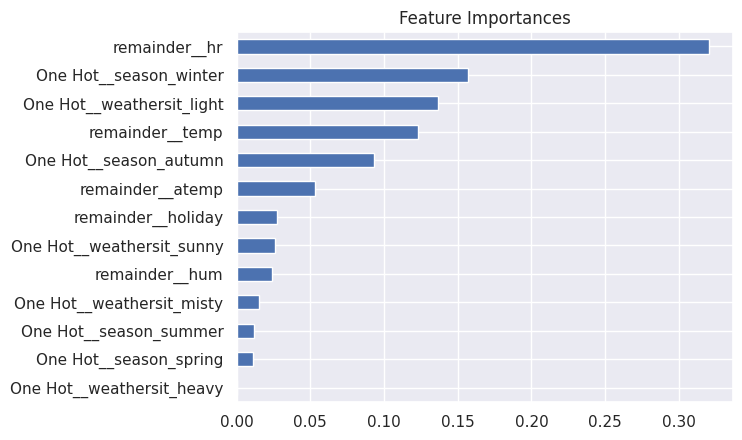

In [75]:
# Plot feature importances
feature_imp = pd.Series(xgb_tuning['model'].feature_importances_, transformer.get_feature_names_out()).sort_values(ascending = True)
feature_imp.plot(kind='barh', title='Feature Importances')

Feature Importance shows which feature that affect the count (bike user) prediction more. From the graph. The leasing hour has the most impact, while the heavy rain/snow weather condition affect it the least. 

## **Conclusion & Recommendations**

### **Conclusions**

Out of all the features, the model considered that the number of bike users mostly affected by the bike using time. Probably because city mobilization or traffic alone is highly influenced by the time of the day, for example the rush hour that caused by the common working people schedule. Thus, the bike leasing system is presumably used more in the rush hour where people more highly-likely to travel using bikes.
On top 2, we have winter season, which from the data exploration we know that it has the lowest demand among the other seasons. 
<br></br>
While the model result comprehend the logic, we can't deny the fact that the Mean Absolute Percentage Error (MAPE) of this model is still very high (around 90). So further tuning or more data treatment could still be done to achive lower error and better machine learning model. Testing and comparing other model performance could also be done to achieve more accurate prediction. 

### **Recommendations**

To improve and build better model performance to predict Bike-Sharing user demands, we can: 

    Do more data treatment, add more data, and use more model for benchmarking. 

Since we can see from the initial benchmarking modeling that the best error metric result are considerably high, there's potentially more that we can do on data preparation and preprocessing step. Therefore it is advisable to do:
- Add more feature or related data. Features used on this model intial dataset are diverse. We could add more features to fill in the gaps of each feature relation or widen the spectrum. 
- Do more complex feature engineering or more explorative feature selection. For this model, we only use a simple feature selection by its the correlation of each features to the target statistically. We can use more further feature engineering and selection to see what's the machine/computer think about what feature would make their learning accuracy higher. 
- Do outlier treatment or add more data to broaden the interquartile area of the target (`cnt`) data distribution, although it is a dependent variable. 
- Use more model to benchmark. We use only several algortithm for benchmark modeling. We can try to use other suitable regression algorithm that robust to outliers. 
- Do deeper model tuning. Due to some limitations, we could not train with more various parameter tuning. So tuning more parameter on different range would be worth to try. 

****
## Saving the Model

In [ ]:
# # Save model
# import pickle

# estimator = Pipeline([('preprocess', transformer), ('model', XGBRegressor(learning_rate=0.21,
#                              max_depth=5,
#                              estimator=100))])
# estimator.fit(X_train, y_train)

# pickle.dump(estimator, open('Model_BikeSharing_XGB.sav', 'wb'))

In [ ]:
# # Load model
# filename = 'Model_BikeSharing_XGB.sav'
# loaded_model = pickle.load(open(filename, 'rb'))

In [ ]:
# np.sqrt(mean_squared_error(y_test, loaded_model.predict(X_test)))

np.float64(97.80473211966792)